In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/Coffee Shop Sales.csv")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Check for missing values


In [4]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
#transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')


In [6]:
# Calculate total sales
df["total_sales"] = df["transaction_qty"] * df["unit_price"]



In [7]:
#Calculate total bills
df["total_bill"] = df["transaction_qty"] * df["unit_price"]


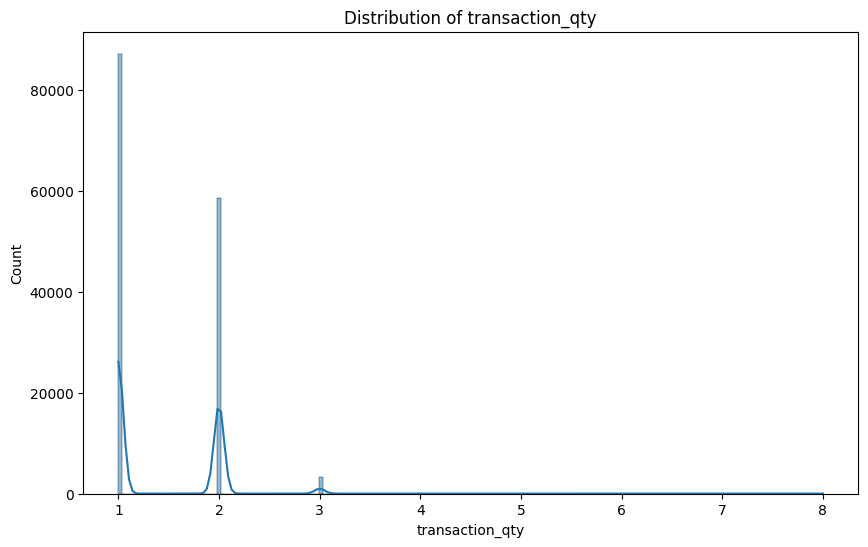

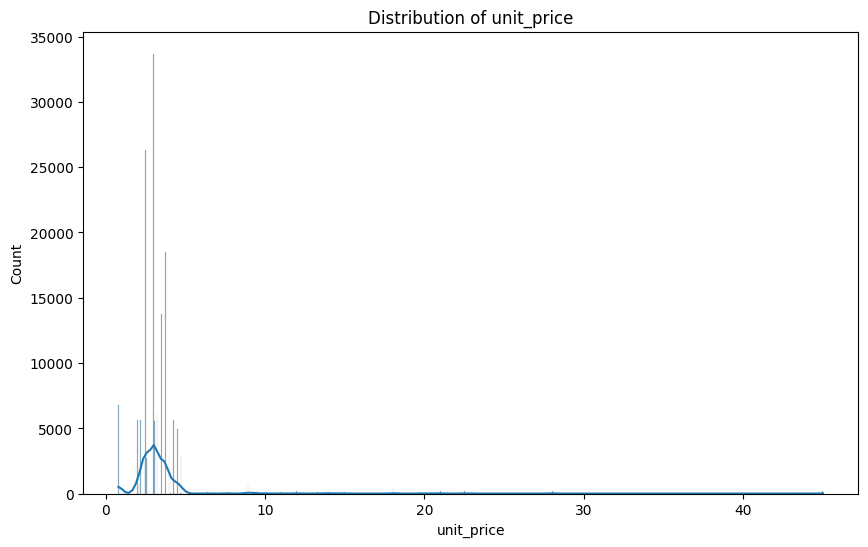

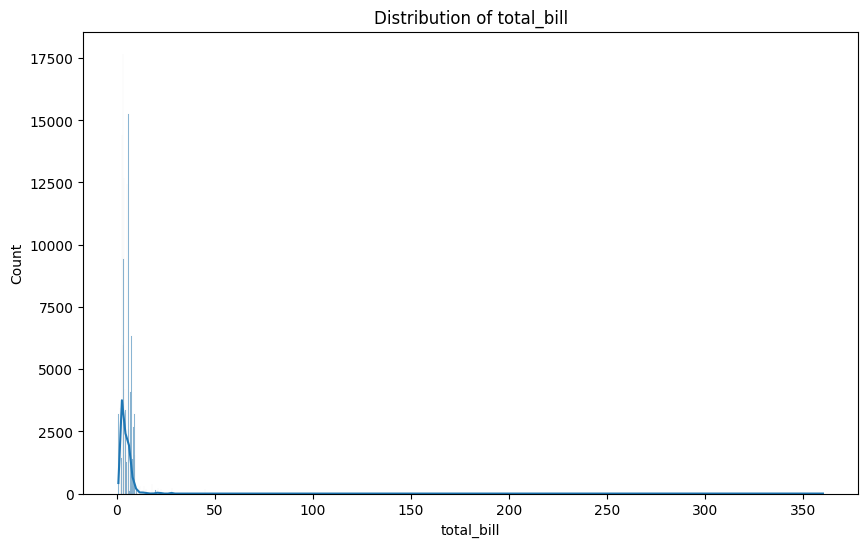

In [8]:

# Histograms for numerical attributes
numerical_cols = ['transaction_qty', 'unit_price', 'total_bill']  # Update with relevant numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Check for outliers in total_bill

In [9]:
# Total bill statistics

print(df["total_bill"].describe())


count    149116.000000
mean          4.686367
std           4.227099
min           0.800000
25%           3.000000
50%           3.750000
75%           6.000000
max         360.000000
Name: total_bill, dtype: float64


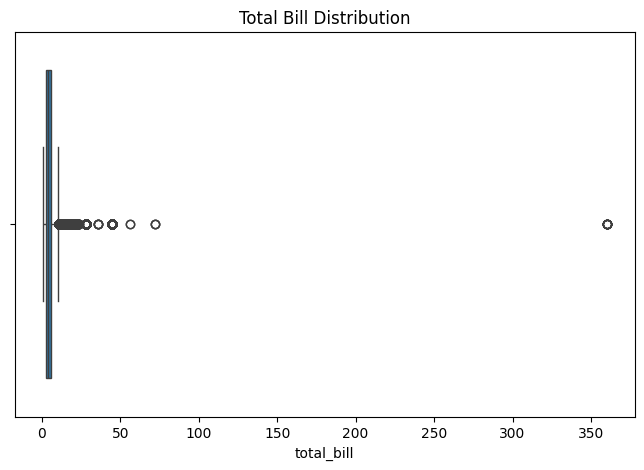

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["total_bill"])
plt.title("Total Bill Distribution")
plt.show()


## Top-Selling Stores or Products

In [11]:
# Revenue by store
store_revenue = df.groupby("store_location")["total_bill"].sum().reset_index().sort_values(by="total_bill", ascending=False)
print(store_revenue)

# Revenue by product category
category_revenue = df.groupby("product_category")["total_bill"].sum().reset_index().sort_values(by="total_bill", ascending=False)
print(category_revenue)


    store_location  total_bill
1   Hell's Kitchen   236511.17
0          Astoria   232243.91
2  Lower Manhattan   230057.25
     product_category  total_bill
2              Coffee   269952.45
8                 Tea   196405.95
0              Bakery    82315.64
4  Drinking Chocolate    72416.00
3        Coffee beans    40085.25
1             Branded    13607.00
6           Loose Tea    11213.60
5            Flavours     8408.80
7  Packaged Chocolate     4407.64


## Exact month and day info

In [12]:
# Extract month, week, and day of the week
df["month"] = df["transaction_date"].dt.month
df["week"] = df["transaction_date"].dt.isocalendar().week
df["day_of_week"] = df["transaction_date"].dt.day_name()


## Monthly sales trend

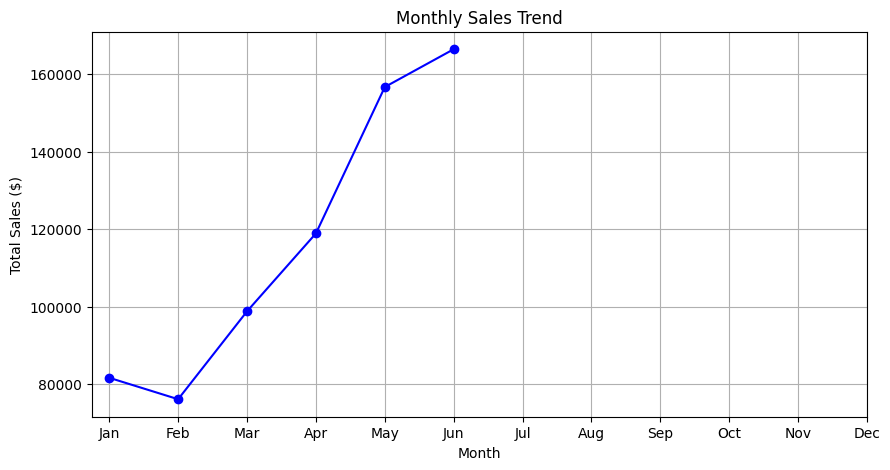

In [13]:
import matplotlib.pyplot as plt

# Aggregate total sales per month
monthly_sales = df.groupby("month")["total_bill"].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["month"], monthly_sales["total_bill"], marker="o", linestyle="-", color="blue")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()


## Hourly sales Pattern

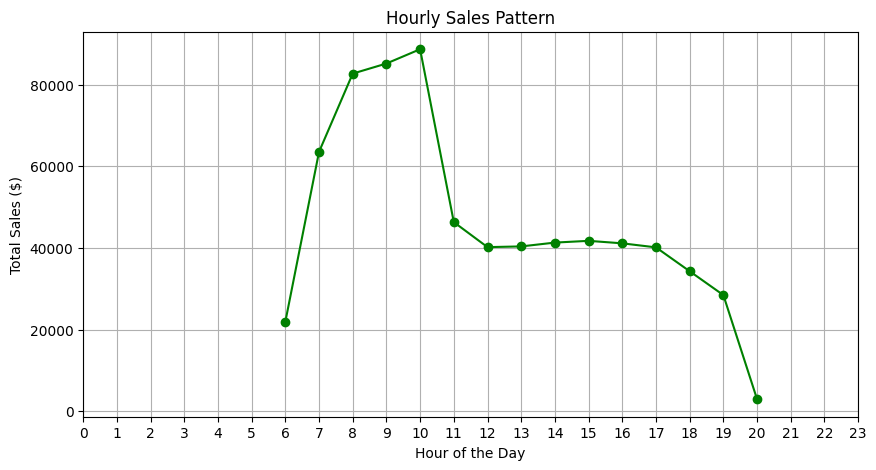

In [14]:
# Extract hour from transaction_time
df["hour"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.hour

# Aggregate total sales per hour
hourly_sales = df.groupby("hour")["total_bill"].sum().reset_index()

# Plot hourly sales trend
plt.figure(figsize=(10, 5))
plt.plot(hourly_sales["hour"], hourly_sales["total_bill"], marker="o", linestyle="-", color="green")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales ($)")
plt.title("Hourly Sales Pattern")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


## Best-Selling Products by Season

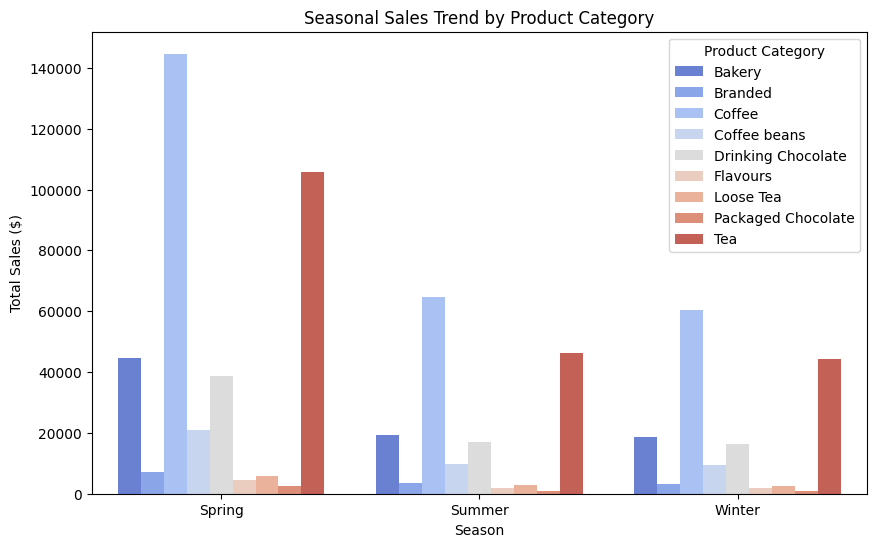

In [15]:
# Define seasons
season_mapping = {1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring", 5: "Spring", 6: "Summer",
                  7: "Summer", 8: "Summer", 9: "Fall", 10: "Fall", 11: "Fall", 12: "Winter"}

df["season"] = df["month"].map(season_mapping)

# Aggregate total sales per product and season
seasonal_sales = df.groupby(["season", "product_category"])["total_bill"].sum().reset_index()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="total_bill", hue="product_category", data=seasonal_sales, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Total Sales ($)")
plt.title("Seasonal Sales Trend by Product Category")
plt.legend(title="Product Category", bbox_to_anchor=(1,1))
plt.show()


## Sales by Day of the Week for Each Product Category

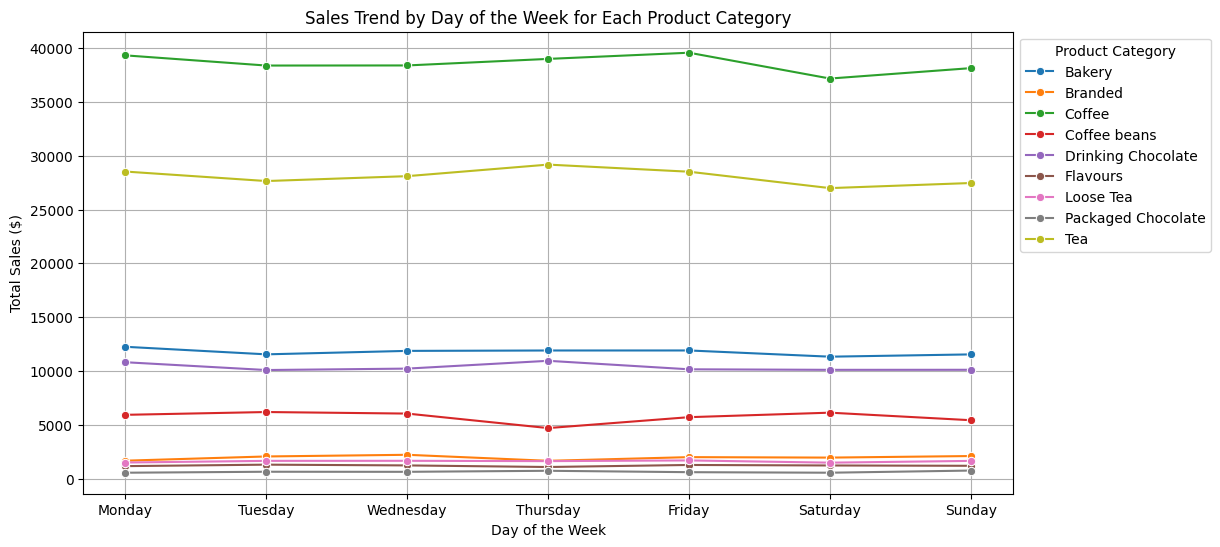

In [16]:
# Aggregate total sales by product category and day of the week
weekday_sales = df.groupby(["day_of_week", "product_category"])["total_bill"].sum().reset_index()

# Order days correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales["day_of_week"] = pd.Categorical(weekday_sales["day_of_week"], categories=weekday_order, ordered=True)

# Plot sales by day of the week for each product category
plt.figure(figsize=(12, 6))
sns.lineplot(x="day_of_week", y="total_bill", hue="product_category", data=weekday_sales, marker="o", palette="tab10")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend by Day of the Week for Each Product Category")
plt.grid(True)
plt.legend(title="Product Category", bbox_to_anchor=(1,1))
plt.show()


In [17]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,total_sales,total_bill,month,week,hour
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.0,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,4.686367,4.686367,3.988881,15.550524,11.735790
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,0.800000,1.000000,1.0,6.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000,3.000000,3.000000,10.0,9.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,3.750000,3.750000,4.000000,17.0,11.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000,6.000000,5.000000,22.0,15.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,360.000000,360.000000,6.000000,52.0,20.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,4.227099,4.227099,1.673091,7.596422,3.764662


# Bivariate
# daily revenue and quantity

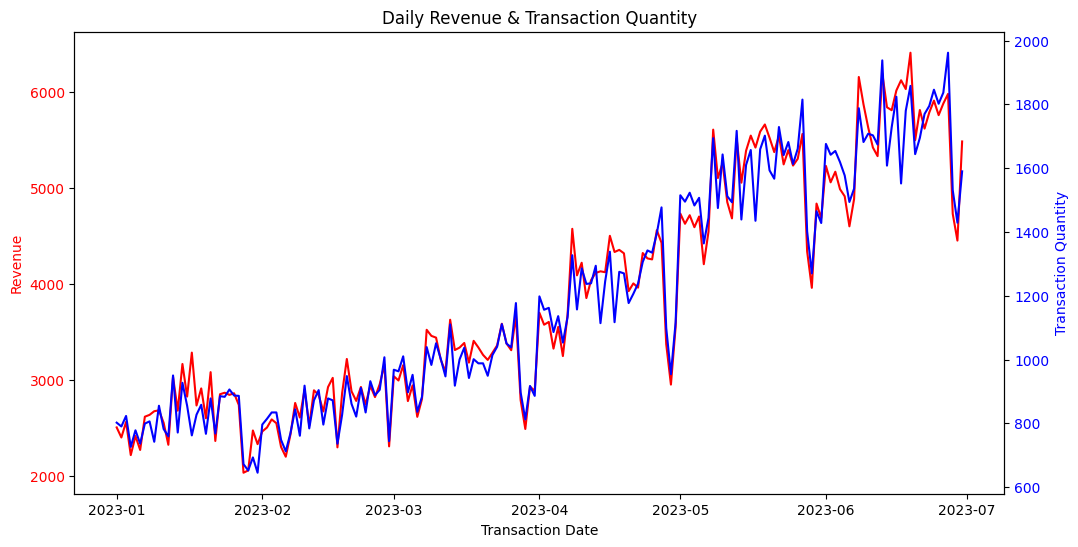

In [29]:
# daily revenue and quantity
daily_revenue = df.groupby('transaction_date')['total_bill'].sum().reset_index()
daily_qty = df.groupby('transaction_date')['transaction_qty'].sum().reset_index()


import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(12, 6))  # Create figure and primary axis

# Create a second y-axis sharing the same x-axis
ax1 = ax0.twinx()  

# Plot Revenue on primary axis (left y-axis)
ax0.plot(daily_revenue['transaction_date'], daily_revenue['total_bill'], color='red', label='Revenue')
ax0.set_ylabel('Revenue', color='red')
ax0.tick_params(axis='y', labelcolor='red')

# Plot Transaction Quantity on secondary axis (right y-axis)
ax1.plot(daily_qty['transaction_date'], daily_qty['transaction_qty'], color='blue', label='Transaction Quantity')
ax1.set_ylabel('Transaction Quantity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set common x-axis label and title
ax0.set_xlabel('Transaction Date')
ax0.set_title('Daily Revenue & Transaction Quantity')

# Show the plot
plt.show()


# Multivariate

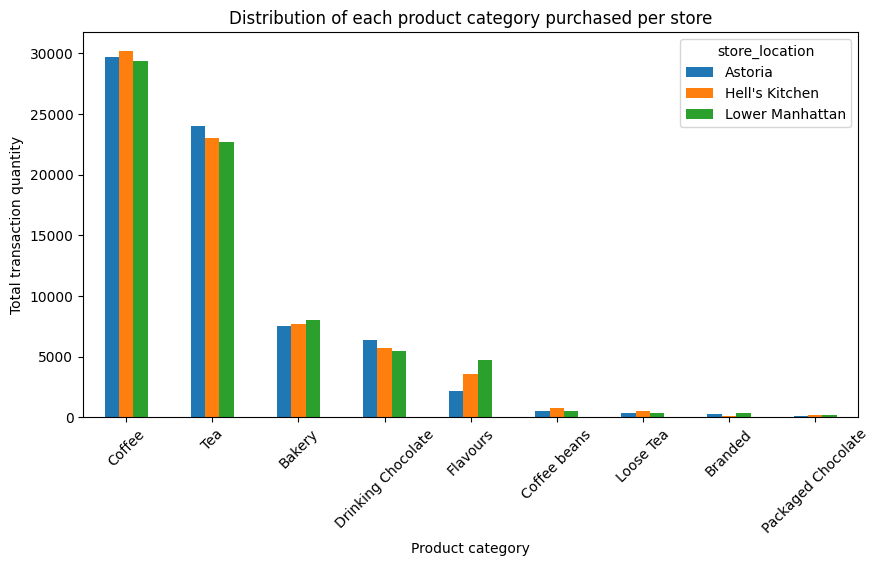

In [ ]:
pivoted = df.pivot_table(index = 'product_category', columns='store_location', values='transaction_qty', aggfunc = 'sum')
pivoted['Total'] =  pivoted.sum(axis = 1)
pivoted.sort_values(by='Total', ascending = False, inplace = True)
pivoted.drop(columns = ['Total'], inplace = True)

pivoted.plot(kind='bar', figsize = (10,5))
plt.xticks(rotation = 45)
plt.xlabel('Product category')
plt.ylabel('Total transaction quantity')
plt.title('Distribution of each product category purchased per store')
plt.show()